In [1]:
#import packages that needed for the tasks
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import wraps
import plotly.express as px

#### (1) Get the Table From F1 Official Website and then design a bar chart to show the winning time for all the 22 races in the year.

In [2]:
#read the web by a valid URL address
f1source = urllib.request.urlopen("https://www.formula1.com/en/results.html/2021/races.html").read()

In [3]:
#display the raw text and code of the website
f1source

b'\n\n<!DOCTYPE html>\n\n<!--[if IE 8 ]> <html class="nojs lt-ie10 lte-ie9 ie8" lang="en"> <![endif]-->\n<!--[if IE 9 ]> <html class="nojs lt-ie10 ie9" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!-->\n\n\n\n\n<html itemscope itemtype="http://schema.org/Website" class="no-js editmode-false" lang="en">\n\n<!--<![endif]-->\n\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n    <meta http-equiv="content-type" content="text/html; charset=UTF-8"/>\n\t<meta name="viewport" content="width=device-width, initial-scale=1"/>\n\n    \n<title>\n\n\n    2021 RACE RESULTS\n    \n\n\n\n\n</title>\n<meta itemprop="name" content="Standings"/>\n<meta itemprop="description" name="description" content="Standings"/>\n<meta name="keywords"/>\n<meta itemprop="image" content="/etc/designs/fom-website/social/f1-default-share.jpg"/>\n\n    <meta name="theme-color" content="#000000"/>\n    <meta n

In [4]:
# convert long text into Document object model
soup = bs.BeautifulSoup(f1source,'lxml')
soup

<!DOCTYPE html>
<!--[if IE 8 ]> <html class="nojs lt-ie10 lte-ie9 ie8" lang="en"> <![endif]--><!--[if IE 9 ]> <html class="nojs lt-ie10 ie9" lang="en"> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html class="no-js editmode-false" itemscope="" itemtype="http://schema.org/Website" lang="en">
<!--<![endif]-->
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>


    2021 RACE RESULTS
    




</title>
<meta content="Standings" itemprop="name"/>
<meta content="Standings" itemprop="description" name="description"/>
<meta name="keywords"/>
<meta content="/etc/designs/fom-website/social/f1-default-share.jpg" itemprop="image"/>
<meta content="#000000" name="theme-color"/>
<meta content="WxqAECrAtZeNGGW2unx9KeghkG-1aYkzQajuzUp4gwk" name="google-site-ve

In [5]:
#take out the table in the webpage and create a DataFrame for it
table = soup.find_all('table')[0]

f12021 = pd.read_html(str(table), flavor = 'bs4', header = [0])[0]

f12021

,Unnamed: 0,Grand Prix,Date,Winner,Car,Laps,Time,Unnamed: 7
0,NaN,Bahrain,28 Mar 2021,Lewis Hamilton HAM,Mercedes,56,1:32:03.897,NaN
1,NaN,Emilia Romagna,18 Apr 2021,Max Verstappen VER,Red Bull Racing Honda,63,2:02:34.598,NaN
2,NaN,Portugal,02 May 2021,Lewis Hamilton HAM,Mercedes,66,1:34:31.421,NaN
3,NaN,Spain,09 May 2021,Lewis Hamilton HAM,Mercedes,66,1:33:07.680,NaN
4,NaN,Monaco,23 May 2021,Max Verstappen VER,Red Bull Racing Honda,78,1:38:56.820,NaN
5,NaN,Azerbaijan,06 Jun 2021,Sergio Perez PER,Red Bull Racing Honda,51,2:13:36.410,NaN
6,NaN,France,20 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,53,1:27:25.770,NaN
7,NaN,Styria,27 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,71,1:22:18.925,NaN
8,NaN,Austria,04 Jul 2021,Max Verstappen VER,Red Bull Racing Honda,71,1:23:54.543,NaN
9,NaN,Great Britain,18 Jul 2021,Lewis Hamilton HAM,Mercedes,52,1:58:23.284,NaN


In [6]:
#drop two columns which are unnecessary variable
f12021.drop(["Unnamed: 0","Unnamed: 7"], axis = 1, inplace = True)
f12021

,Grand Prix,Date,Winner,Car,Laps,Time
0,Bahrain,28 Mar 2021,Lewis Hamilton HAM,Mercedes,56,1:32:03.897
1,Emilia Romagna,18 Apr 2021,Max Verstappen VER,Red Bull Racing Honda,63,2:02:34.598
2,Portugal,02 May 2021,Lewis Hamilton HAM,Mercedes,66,1:34:31.421
3,Spain,09 May 2021,Lewis Hamilton HAM,Mercedes,66,1:33:07.680
4,Monaco,23 May 2021,Max Verstappen VER,Red Bull Racing Honda,78,1:38:56.820
5,Azerbaijan,06 Jun 2021,Sergio Perez PER,Red Bull Racing Honda,51,2:13:36.410
6,France,20 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,53,1:27:25.770
7,Styria,27 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,71,1:22:18.925
8,Austria,04 Jul 2021,Max Verstappen VER,Red Bull Racing Honda,71,1:23:54.543
9,Great Britain,18 Jul 2021,Lewis Hamilton HAM,Mercedes,52,1:58:23.284


In [7]:
#formatting ‘time’ in minutes
f12021['Time_New'] = f12021['Time'].apply( lambda x : int(x[0])* 60.0 + int(x[2:4]) + float (x[5:]) /60.0).round(2)
#delete the column 'Time'
f12021.drop(['Time'],axis = 1, inplace = True)
f12021

,Grand Prix,Date,Winner,Car,Laps,Time_New
0,Bahrain,28 Mar 2021,Lewis Hamilton HAM,Mercedes,56,92.06
1,Emilia Romagna,18 Apr 2021,Max Verstappen VER,Red Bull Racing Honda,63,122.58
2,Portugal,02 May 2021,Lewis Hamilton HAM,Mercedes,66,94.52
3,Spain,09 May 2021,Lewis Hamilton HAM,Mercedes,66,93.13
4,Monaco,23 May 2021,Max Verstappen VER,Red Bull Racing Honda,78,98.95
5,Azerbaijan,06 Jun 2021,Sergio Perez PER,Red Bull Racing Honda,51,133.61
6,France,20 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,53,87.43
7,Styria,27 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,71,82.32
8,Austria,04 Jul 2021,Max Verstappen VER,Red Bull Racing Honda,71,83.91
9,Great Britain,18 Jul 2021,Lewis Hamilton HAM,Mercedes,52,118.39


In [8]:
#Add a new column which include driver names and races location
f12021['Grand Prix + Winner'] = f12021['Grand Prix']+ ' _ ' + f12021 ['Winner']

f12021

,Grand Prix,Date,Winner,Car,Laps,Time_New,Grand Prix + Winner
0,Bahrain,28 Mar 2021,Lewis Hamilton HAM,Mercedes,56,92.06,Bahrain _ Lewis Hamilton HAM
1,Emilia Romagna,18 Apr 2021,Max Verstappen VER,Red Bull Racing Honda,63,122.58,Emilia Romagna _ Max Verstappen VER
2,Portugal,02 May 2021,Lewis Hamilton HAM,Mercedes,66,94.52,Portugal _ Lewis Hamilton HAM
3,Spain,09 May 2021,Lewis Hamilton HAM,Mercedes,66,93.13,Spain _ Lewis Hamilton HAM
4,Monaco,23 May 2021,Max Verstappen VER,Red Bull Racing Honda,78,98.95,Monaco _ Max Verstappen VER
5,Azerbaijan,06 Jun 2021,Sergio Perez PER,Red Bull Racing Honda,51,133.61,Azerbaijan _ Sergio Perez PER
6,France,20 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,53,87.43,France _ Max Verstappen VER
7,Styria,27 Jun 2021,Max Verstappen VER,Red Bull Racing Honda,71,82.32,Styria _ Max Verstappen VER
8,Austria,04 Jul 2021,Max Verstappen VER,Red Bull Racing Honda,71,83.91,Austria _ Max Verstappen VER
9,Great Britain,18 Jul 2021,Lewis Hamilton HAM,Mercedes,52,118.39,Great Britain _ Lewis Hamilton HAM


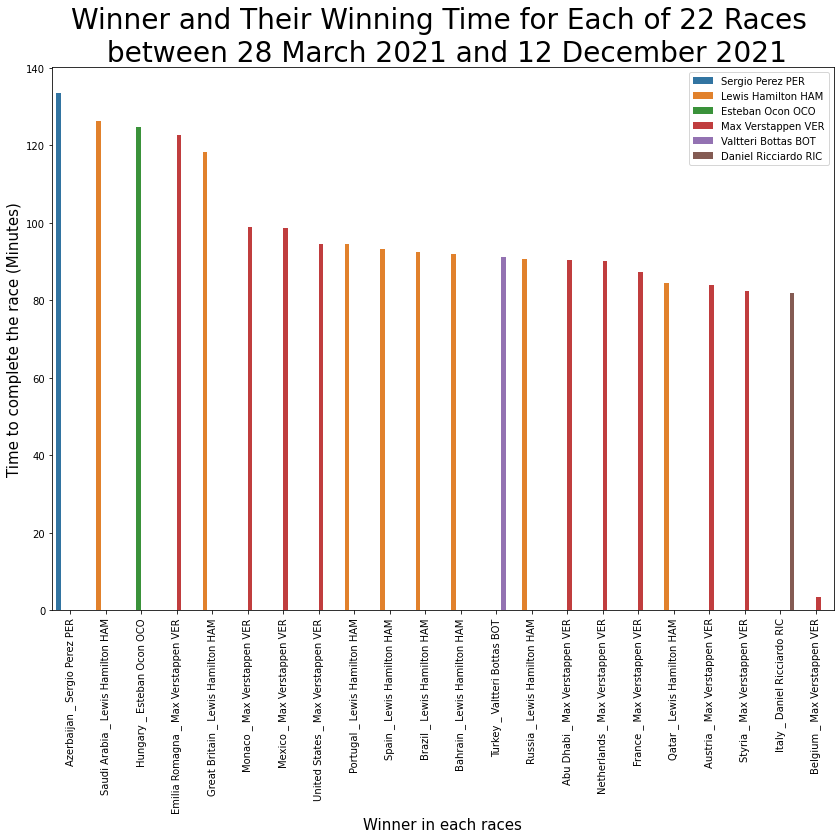

In [9]:
#Sketch a bar chart by using sns.barplot
plt.figure(figsize = (14,10 ))
sns.barplot(x = 'Grand Prix + Winner', y ='Time_New', hue = 'Winner',
            data = f12021.sort_values ('Time_New', ascending = False))

plt.xlabel("Winner in each races", fontsize = 15)
plt.xticks(rotation = 90 )
plt.ylabel("Time to complete the race (Minutes)", fontsize =15)
plt.title("Winner and Their Winning Time for Each of 22 Races \n between 28 March 2021 and 12 December 2021",fontsize = 28)
plt.legend(loc = 'best') #Ref:https://www.geeksforgeeks.org/change-the-legend-position-in-matplotlib/
plt.show()



#### (2) Get all the URL Links for all 22 races of the year

In [10]:
#read the webpage by a valid URL address 
source = urllib.request.urlopen("https://www.formula1.com/en/results.html/2021/races.html").read()
soup = bs.BeautifulSoup(source,'lxml')
soup

<!DOCTYPE html>
<!--[if IE 8 ]> <html class="nojs lt-ie10 lte-ie9 ie8" lang="en"> <![endif]--><!--[if IE 9 ]> <html class="nojs lt-ie10 ie9" lang="en"> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html class="no-js editmode-false" itemscope="" itemtype="http://schema.org/Website" lang="en">
<!--<![endif]-->
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>


    2021 RACE RESULTS
    




</title>
<meta content="Standings" itemprop="name"/>
<meta content="Standings" itemprop="description" name="description"/>
<meta name="keywords"/>
<meta content="/etc/designs/fom-website/social/f1-default-share.jpg" itemprop="image"/>
<meta content="#000000" name="theme-color"/>
<meta content="WxqAECrAtZeNGGW2unx9KeghkG-1aYkzQajuzUp4gwk" name="google-site-ve

In [11]:
#For finding hyperlink urls, findout all the urls by using the 'a' element
all_urls = soup.find_all('a')
all_urls

[<a class="skip" href="#globalNav" tabindex="1">Skip to Global Nav</a>,
 <a class="skip" href="#primaryNav" tabindex="2">Skip to Primary content</a>,
 <a class="skip" href="#main" tabindex="3">Skip to main content</a>,
 <a href="/en.html">
 <span><img alt="Formula 1" src="/etc/designs/fom-website/images/f1_logo.svg"/></span>
 </a>,
 <a class="signin login-link icon icon-user" data-locationinpage="navigation" data-pathtype="internal" href="#"><span class="text-hide">Login/Register</span></a>,
 <a class="user-action icon icon-user" data-locationinpage="navigation" data-pathtype="internal" data-target="#userLoggedInOverlay" data-toggle="modal" href="#"><span class="text-hide">User Options</span></a>,
 <a href="/en.html">
 <span><img alt="Formula 1" src="/etc/designs/fom-website/images/f1_logo.svg"/></span>
 </a>,
 <a class="nav-mainlink" data-locationinpage="navigation" data-pathtype="internal" href="/en/latest.html">
 <span class="link-text">Latest</span>
 </a>,
 <a class="f1-bold--s f1-

In [12]:
#use for loop to load all the webpages with race result and print it out
race_urls = []
for url in all_urls:
    if ('2021' in str(url.get('href'))) and ('race-result' in str(url.get('href'))) and (url.get('href') not in race_urls):
            race_urls.append(url.get('href'))
race_urls

['/en/results.html/2021/races/1064/bahrain/race-result.html',
 '/en/results.html/2021/races/1065/italy/race-result.html',
 '/en/results.html/2021/races/1066/portugal/race-result.html',
 '/en/results.html/2021/races/1086/spain/race-result.html',
 '/en/results.html/2021/races/1067/monaco/race-result.html',
 '/en/results.html/2021/races/1068/azerbaijan/race-result.html',
 '/en/results.html/2021/races/1070/france/race-result.html',
 '/en/results.html/2021/races/1092/austria/race-result.html',
 '/en/results.html/2021/races/1071/austria/race-result.html',
 '/en/results.html/2021/races/1072/great-britain/race-result.html',
 '/en/results.html/2021/races/1073/hungary/race-result.html',
 '/en/results.html/2021/races/1074/belgium/race-result.html',
 '/en/results.html/2021/races/1075/netherlands/race-result.html',
 '/en/results.html/2021/races/1076/italy/race-result.html',
 '/en/results.html/2021/races/1077/russia/race-result.html',
 '/en/results.html/2021/races/1078/turkey/race-result.html',
 '/e

#### (3) Get all the URLs Links for Fast Laps information

#### Then design a plot to show the average speed for each of the drivers in 22 races

In [13]:
# Create a DataFrame for 'race-result.html'
raceresultslist = ['/en/results.html/2021/races/1064/bahrain/race-result.html',
 '/en/results.html/2021/races/1065/italy/race-result.html',
 '/en/results.html/2021/races/1066/portugal/race-result.html',
 '/en/results.html/2021/races/1086/spain/race-result.html',
 '/en/results.html/2021/races/1067/monaco/race-result.html',
 '/en/results.html/2021/races/1068/azerbaijan/race-result.html',
 '/en/results.html/2021/races/1070/france/race-result.html',
 '/en/results.html/2021/races/1092/austria/race-result.html',
 '/en/results.html/2021/races/1071/austria/race-result.html',
 '/en/results.html/2021/races/1072/great-britain/race-result.html',
 '/en/results.html/2021/races/1073/hungary/race-result.html',
 '/en/results.html/2021/races/1074/belgium/race-result.html',
 '/en/results.html/2021/races/1075/netherlands/race-result.html',
 '/en/results.html/2021/races/1076/italy/race-result.html',
 '/en/results.html/2021/races/1077/russia/race-result.html',
 '/en/results.html/2021/races/1078/turkey/race-result.html',
 '/en/results.html/2021/races/1102/united-states/race-result.html',
 '/en/results.html/2021/races/1103/mexico/race-result.html',
 '/en/results.html/2021/races/1104/brazil/race-result.html',
 '/en/results.html/2021/races/1105/qatar/race-result.html',
 '/en/results.html/2021/races/1106/saudi-arabia/race-result.html',
 '/en/results.html/2021/races/1107/abu-dhabi/race-result.html']

df_RR = pd.DataFrame(raceresultslist, columns = ['URLs'])
pd.set_option('display.max_colwidth', 100) #Ref:https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows
df_RR

,URLs
0,/en/results.html/2021/races/1064/bahrain/race-result.html
1,/en/results.html/2021/races/1065/italy/race-result.html
2,/en/results.html/2021/races/1066/portugal/race-result.html
3,/en/results.html/2021/races/1086/spain/race-result.html
4,/en/results.html/2021/races/1067/monaco/race-result.html
5,/en/results.html/2021/races/1068/azerbaijan/race-result.html
6,/en/results.html/2021/races/1070/france/race-result.html
7,/en/results.html/2021/races/1092/austria/race-result.html
8,/en/results.html/2021/races/1071/austria/race-result.html
9,/en/results.html/2021/races/1072/great-britain/race-result.html


In [14]:
#Replace 'race-result' to 'fatest-laps'
df_RR['URLs'] = df_RR['URLs'].str.replace("race-result.html","fastest-laps.html") 

#Ref: https://sparkbyexamples.com/pandas/pandas-replace-string-examples/
df_RR


/var/folders/4b/kstgmfqd5yjd8r1xr9qm_ff40000gn/T/ipykernel_94962/4210936820.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_RR['URLs'] = df_RR['URLs'].str.replace("race-result.html","fastest-laps.html")


,URLs
0,/en/results.html/2021/races/1064/bahrain/fastest-laps.html
1,/en/results.html/2021/races/1065/italy/fastest-laps.html
2,/en/results.html/2021/races/1066/portugal/fastest-laps.html
3,/en/results.html/2021/races/1086/spain/fastest-laps.html
4,/en/results.html/2021/races/1067/monaco/fastest-laps.html
5,/en/results.html/2021/races/1068/azerbaijan/fastest-laps.html
6,/en/results.html/2021/races/1070/france/fastest-laps.html
7,/en/results.html/2021/races/1092/austria/fastest-laps.html
8,/en/results.html/2021/races/1071/austria/fastest-laps.html
9,/en/results.html/2021/races/1072/great-britain/fastest-laps.html


In [15]:
#create a new dataframe that can show the exactly URLs to the right webpage
#so we can copy and paste it to access to the webpage

df_FL1 = 'https://www.formula1.com' + pd.DataFrame(df_RR['URLs'], columns = ['URLs'])
df_FL1

,URLs
0,https://www.formula1.com/en/results.html/2021/races/1064/bahrain/fastest-laps.html
1,https://www.formula1.com/en/results.html/2021/races/1065/italy/fastest-laps.html
2,https://www.formula1.com/en/results.html/2021/races/1066/portugal/fastest-laps.html
3,https://www.formula1.com/en/results.html/2021/races/1086/spain/fastest-laps.html
4,https://www.formula1.com/en/results.html/2021/races/1067/monaco/fastest-laps.html
5,https://www.formula1.com/en/results.html/2021/races/1068/azerbaijan/fastest-laps.html
6,https://www.formula1.com/en/results.html/2021/races/1070/france/fastest-laps.html
7,https://www.formula1.com/en/results.html/2021/races/1092/austria/fastest-laps.html
8,https://www.formula1.com/en/results.html/2021/races/1071/austria/fastest-laps.html
9,https://www.formula1.com/en/results.html/2021/races/1072/great-britain/fastest-laps.html


In [16]:
##Due to the announcement on Ed, delete '11' (excluding the race in Belgium).
df_FL1 = df_FL1.drop(df_FL1.index[11])
df_FL1

,URLs
0,https://www.formula1.com/en/results.html/2021/races/1064/bahrain/fastest-laps.html
1,https://www.formula1.com/en/results.html/2021/races/1065/italy/fastest-laps.html
2,https://www.formula1.com/en/results.html/2021/races/1066/portugal/fastest-laps.html
3,https://www.formula1.com/en/results.html/2021/races/1086/spain/fastest-laps.html
4,https://www.formula1.com/en/results.html/2021/races/1067/monaco/fastest-laps.html
5,https://www.formula1.com/en/results.html/2021/races/1068/azerbaijan/fastest-laps.html
6,https://www.formula1.com/en/results.html/2021/races/1070/france/fastest-laps.html
7,https://www.formula1.com/en/results.html/2021/races/1092/austria/fastest-laps.html
8,https://www.formula1.com/en/results.html/2021/races/1071/austria/fastest-laps.html
9,https://www.formula1.com/en/results.html/2021/races/1072/great-britain/fastest-laps.html


In [17]:
#since one row was deleted, rearrange the Index of the DataFrame
df_FL1.reset_index(drop = True, inplace = True)
#Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

df_FL1


,URLs
0,https://www.formula1.com/en/results.html/2021/races/1064/bahrain/fastest-laps.html
1,https://www.formula1.com/en/results.html/2021/races/1065/italy/fastest-laps.html
2,https://www.formula1.com/en/results.html/2021/races/1066/portugal/fastest-laps.html
3,https://www.formula1.com/en/results.html/2021/races/1086/spain/fastest-laps.html
4,https://www.formula1.com/en/results.html/2021/races/1067/monaco/fastest-laps.html
5,https://www.formula1.com/en/results.html/2021/races/1068/azerbaijan/fastest-laps.html
6,https://www.formula1.com/en/results.html/2021/races/1070/france/fastest-laps.html
7,https://www.formula1.com/en/results.html/2021/races/1092/austria/fastest-laps.html
8,https://www.formula1.com/en/results.html/2021/races/1071/austria/fastest-laps.html
9,https://www.formula1.com/en/results.html/2021/races/1072/great-britain/fastest-laps.html


In [18]:
#Create a dataframe that contains all the 21 races 
dffast = pd.DataFrame()
for i in range(21):
    source = urllib.request.urlopen(df_FL1['URLs'][i]).read()
    soup = bs.BeautifulSoup(source,'lxml')
    
    table = soup.find_all('table')[0]
    df = pd.read_html(str(table), flavor = 'bs4', header = [0])[0]  
    df['Race_No.'] = i
    dffast = pd.concat([dffast,df])
dffast

,Unnamed: 0,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed,Unnamed: 9,Race_No.
0,NaN,1,77,Valtteri Bottas BOT,Mercedes,56,19:39:51,1:32.090,211.566,NaN,0
1,NaN,2,33,Max Verstappen VER,Red Bull Racing Honda,41,19:15:41,1:33.228,208.984,NaN,0
2,NaN,3,11,Sergio Perez PER,Red Bull Racing Honda,44,19:21:10,1:33.970,207.334,NaN,0
3,NaN,4,44,Lewis Hamilton HAM,Mercedes,44,19:20:17,1:34.015,207.235,NaN,0
4,NaN,5,10,Pierre Gasly GAS,AlphaTauri Honda,48,19:28:30,1:34.090,207.069,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
14,NaN,15,6,Nicholas Latifi LAT,Williams Mercedes,30,17:49:38,1:29.293,212.912,NaN,20
15,NaN,16,99,Antonio Giovinazzi GIO,Alfa Romeo Racing Ferrari,33,17:53:42,1:29.442,212.557,NaN,20
16,NaN,17,47,Mick Schumacher MSC,Haas Ferrari,42,18:08:15,1:29.457,212.522,NaN,20
17,NaN,18,7,Kimi Räikkönen RAI,Alfa Romeo Racing Ferrari,23,17:38:51,1:29.698,211.951,NaN,20


In [19]:
#Drop columns with 'Unnamed'
dffast = dffast.drop(['Unnamed: 0','Unnamed: 9'], axis = 1)
dffast

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed,Race_No.
0,1,77,Valtteri Bottas BOT,Mercedes,56,19:39:51,1:32.090,211.566,0
1,2,33,Max Verstappen VER,Red Bull Racing Honda,41,19:15:41,1:33.228,208.984,0
2,3,11,Sergio Perez PER,Red Bull Racing Honda,44,19:21:10,1:33.970,207.334,0
3,4,44,Lewis Hamilton HAM,Mercedes,44,19:20:17,1:34.015,207.235,0
4,5,10,Pierre Gasly GAS,AlphaTauri Honda,48,19:28:30,1:34.090,207.069,0
...,...,...,...,...,...,...,...,...,...
14,15,6,Nicholas Latifi LAT,Williams Mercedes,30,17:49:38,1:29.293,212.912,20
15,16,99,Antonio Giovinazzi GIO,Alfa Romeo Racing Ferrari,33,17:53:42,1:29.442,212.557,20
16,17,47,Mick Schumacher MSC,Haas Ferrari,42,18:08:15,1:29.457,212.522,20
17,18,7,Kimi Räikkönen RAI,Alfa Romeo Racing Ferrari,23,17:38:51,1:29.698,211.951,20


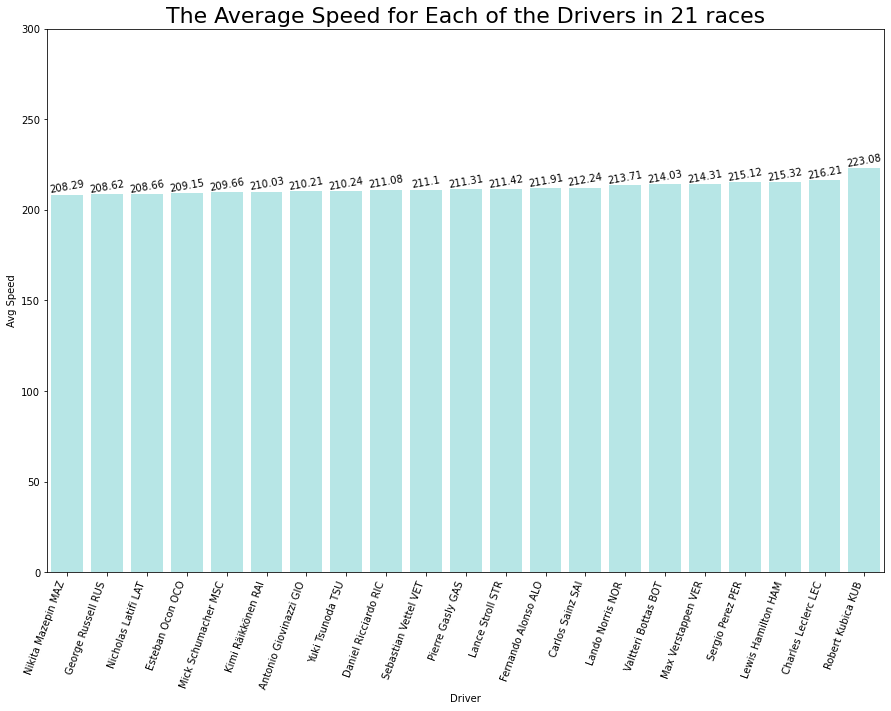

In [20]:
#Sketch a bar plot to visualize driver's averge speedin this 21 races
result = dffast.groupby(["Driver"])["Avg Speed"].aggregate(np.mean).reset_index().sort_values("Avg Speed")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Driver", y="Avg Speed",  data=dffast, estimator = np.mean, color='paleturquoise', 
                 ci = None, order = result["Driver"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70, ha = 'right');
ax.set_ylim(0,300)
ax.bar_label(ax.containers[0], labels = np.round(result["Avg Speed"], 2), label_type ='edge', rotation = 10);
plt.title("The Average Speed for Each of the Drivers in 21 races", fontsize = 22)
plt.show()

#### (4) Design a line plot to show the cumulative points (as the y-axis) of all the drivers against the races (as the x-axis) from 28 March 2021 and 12 December 2021

In [21]:
#read the season_results2021.csv files and create a dataframe for it 
df_points = pd.read_csv("season_results2021.csv")
df_points

,Driver,Car,bahrain,italy,portugal,spain,monaco,azerbaijan,france,austria,...,netherlands,italy_1,russia,turkey,united-states,mexico,brazil,qatar,saudi-arabia,abu-dhabi
0,Daniel Ricciardo RIC,MCL,6.0,8.0,2.0,8.0,0.0,2.0,8.0,0.0,...,0.0,26.0,12.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0
1,Lando Norris NOR,MCL,12.0,15.0,10.0,4.0,15.0,10.0,10.0,10.0,...,1.0,18.0,7.0,6.0,4.0,1.0,1.0,2.0,1.0,6.0
2,Sebastian Vettel VET,AST,0.0,0.0,0.0,0.0,10.0,18.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0
3,Nicholas Latifi LAT,WIL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kimi Räikkönen RAI,ALF,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
5,Nikita Mazepin MAZ,HAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Pierre Gasly GAS,ALP,0.0,6.0,1.0,1.0,8.0,15.0,6.0,0.0,...,12.0,0.0,0.0,8.0,0.0,12.0,6.0,0.0,8.0,10.0
7,Sergio Perez PER,RED,10.0,0.0,12.0,10.0,12.0,25.0,15.0,12.0,...,4.0,10.0,2.0,15.0,15.0,15.0,13.0,12.0,0.0,0.0
8,Fernando Alonso ALO,ALP,0.0,1.0,4.0,0.0,0.0,8.0,4.0,2.0,...,8.0,4.0,8.0,0.0,0.0,2.0,2.0,15.0,0.0,4.0
9,Charles Leclerc LEC,FER,8.0,12.0,8.0,12.0,0.0,12.0,0.0,6.0,...,10.0,12.0,0.0,12.0,12.0,10.0,10.0,4.0,6.0,1.0


In [22]:
#Create a new DateFrame which can displayed the cumulative points for each car driver on the table 
df_points1 = df_points.iloc[:,0]
df_points2 = df_points.iloc[:,2:].cumsum (axis = 'columns', skipna = False)
#Ref: https://www.educative.io/answers/what-is-the-cumsum-function-in-pandas
df_points_cs = pd.concat([df_points1,df_points2], axis = 1 )
pd.set_option('display.max_columns', 200)
df_points_cs

,Driver,bahrain,italy,portugal,spain,monaco,azerbaijan,france,austria,austria_1,great-britain,hungary,belgium,netherlands,italy_1,russia,turkey,united-states,mexico,brazil,qatar,saudi-arabia,abu-dhabi
0,Daniel Ricciardo RIC,6.0,14.0,16.0,24.0,24.0,26.0,34.0,34.0,40.0,50.0,50.0,56.0,56.0,82.0,94.0,94.0,104.0,104.0,104.0,104.0,114.0,114.0
1,Lando Norris NOR,12.0,27.0,37.0,41.0,56.0,66.0,76.0,86.0,101.0,113.0,113.0,113.0,114.0,132.0,139.0,145.0,149.0,150.0,151.0,153.0,154.0,160.0
2,Sebastian Vettel VET,0.0,0.0,0.0,0.0,10.0,28.0,30.0,30.0,30.0,30.0,30.0,35.0,35.0,35.0,35.0,35.0,36.0,42.0,42.0,43.0,43.0,43.0
3,Nicholas Latifi LAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4,Kimi Räikkönen RAI,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,6.0,6.0,6.0,10.0,10.0,10.0,10.0,10.0
5,Nikita Mazepin MAZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Pierre Gasly GAS,0.0,6.0,7.0,8.0,16.0,31.0,37.0,37.0,39.0,39.0,50.0,54.0,66.0,66.0,66.0,74.0,74.0,86.0,92.0,92.0,100.0,110.0
7,Sergio Perez PER,10.0,10.0,22.0,32.0,44.0,69.0,84.0,96.0,104.0,104.0,104.0,104.0,108.0,118.0,120.0,135.0,150.0,165.0,178.0,190.0,190.0,190.0
8,Fernando Alonso ALO,0.0,1.0,5.0,5.0,5.0,13.0,17.0,19.0,20.0,26.0,38.0,38.0,46.0,50.0,58.0,58.0,58.0,60.0,62.0,77.0,77.0,81.0
9,Charles Leclerc LEC,8.0,20.0,28.0,40.0,40.0,52.0,52.0,58.0,62.0,80.0,80.0,82.0,92.0,104.0,104.0,116.0,128.0,138.0,148.0,152.0,158.0,159.0


In [23]:
# Unpivot a DataFrame from wide to long format
#Ref:https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df_points_cs = pd.melt (df_points_cs, id_vars = ['Driver'])
df_points_cs

,Driver,variable,value
0,Daniel Ricciardo RIC,bahrain,6.0
1,Lando Norris NOR,bahrain,12.0
2,Sebastian Vettel VET,bahrain,0.0
3,Nicholas Latifi LAT,bahrain,0.0
4,Kimi Räikkönen RAI,bahrain,0.0
...,...,...,...
457,Carlos Sainz SAI,abu-dhabi,163.0
458,George Russell RUS,abu-dhabi,16.0
459,Valtteri Bottas BOT,abu-dhabi,219.0
460,Robert Kubica KUB,abu-dhabi,0.0


In [24]:
#rename the columns
df_points_cs.columns = ['Driver', 'Races_Location', 'Points']
df_points_cs

,Driver,Races_Location,Points
0,Daniel Ricciardo RIC,bahrain,6.0
1,Lando Norris NOR,bahrain,12.0
2,Sebastian Vettel VET,bahrain,0.0
3,Nicholas Latifi LAT,bahrain,0.0
4,Kimi Räikkönen RAI,bahrain,0.0
...,...,...,...
457,Carlos Sainz SAI,abu-dhabi,163.0
458,George Russell RUS,abu-dhabi,16.0
459,Valtteri Bottas BOT,abu-dhabi,219.0
460,Robert Kubica KUB,abu-dhabi,0.0


In [25]:
#Convert the long-form to wide-form , but this time make the table in order of F1 races
df_points_csnew = df_points_cs.pivot("Races_Location", "Driver", "Points")
OrderofRaces = ['bahrain','italy', 'portugal', 'spain', 'monaco', 'azerbaijan', 'france', 'austria', 'austria_1',
                'great-britain','hungary', 'belgium', 'netherlands', 'italy_1', 'russia', 'turkey',  'united-states',
                'mexico', 'brazil', 'qatar', 'saudi-arabia','abu-dhabi']

df_points_csnew1 = df_points_csnew.reindex(index = OrderofRaces)
df_points_csnew1

Driver,Antonio Giovinazzi GIO,Carlos Sainz SAI,Charles Leclerc LEC,Daniel Ricciardo RIC,Esteban Ocon OCO,Fernando Alonso ALO,George Russell RUS,Kimi Räikkönen RAI,Lance Stroll STR,Lando Norris NOR,Lewis Hamilton HAM,Max Verstappen VER,Mick Schumacher MSC,Nicholas Latifi LAT,Nikita Mazepin MAZ,Pierre Gasly GAS,Robert Kubica KUB,Sebastian Vettel VET,Sergio Perez PER,Valtteri Bottas BOT,Yuki Tsunoda TSU
Races_Location,,,,,,,,,,,,,,,,,,,,,
bahrain,0.0,4.0,8.0,6.0,0.0,0.0,0.0,0.0,1.0,12.0,25.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,16.0,2.0
italy,0.0,14.0,20.0,14.0,2.0,1.0,0.0,0.0,5.0,27.0,44.0,43.0,0.0,0.0,0.0,6.0,0.0,0.0,10.0,16.0,2.0
portugal,0.0,14.0,28.0,16.0,8.0,5.0,0.0,0.0,5.0,37.0,69.0,61.0,0.0,0.0,0.0,7.0,0.0,0.0,22.0,32.0,2.0
spain,0.0,20.0,40.0,24.0,10.0,5.0,0.0,0.0,5.0,41.0,94.0,80.0,0.0,0.0,0.0,8.0,0.0,0.0,32.0,47.0,2.0
monaco,1.0,38.0,40.0,24.0,12.0,5.0,0.0,0.0,9.0,56.0,101.0,105.0,0.0,0.0,0.0,16.0,0.0,10.0,44.0,47.0,2.0
azerbaijan,1.0,42.0,52.0,26.0,12.0,13.0,0.0,1.0,9.0,66.0,101.0,105.0,0.0,0.0,0.0,31.0,0.0,28.0,69.0,47.0,8.0
france,1.0,42.0,52.0,34.0,12.0,17.0,0.0,1.0,10.0,76.0,119.0,131.0,0.0,0.0,0.0,37.0,0.0,30.0,84.0,59.0,8.0
austria,1.0,50.0,58.0,34.0,12.0,19.0,0.0,1.0,14.0,86.0,138.0,156.0,0.0,0.0,0.0,37.0,0.0,30.0,96.0,74.0,9.0
austria_1,1.0,60.0,62.0,40.0,12.0,20.0,0.0,1.0,14.0,101.0,150.0,182.0,0.0,0.0,0.0,39.0,0.0,30.0,104.0,92.0,9.0


Text(0.5, 1.0, 'Cumulative Points of All the Drivers Against the Races \n from 28 March 2021 and 12 December 2021')

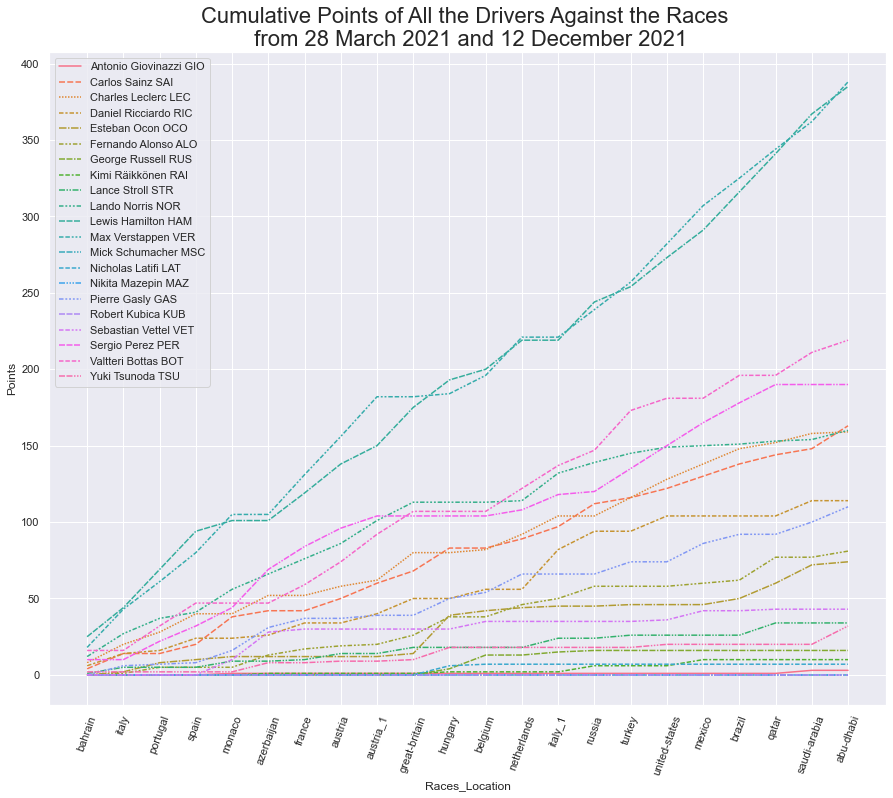

In [29]:
#Draw a line plot
sns.set(palette = 'RdBu')
plt.figure (figsize = (15,12))
sns.lineplot (data = df_points_csnew1, sort= False)
#It's arranged according to the original index

plt.xticks(rotation = 70)
plt.ylabel("Points")
plt.legend(loc = 'best')
plt.title("Cumulative Points of All the Drivers Against the Races \n from 28 March 2021 and 12 December 2021", fontsize = 22)

In [ ]:
#--------——End of the Project---------